In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/fdev/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
# load all the wsb_* files
stocks = ["GME", "AMC", "BB", "TSLA", "PLTR", "MSFT", "BBBY", "SPY", "AAPL"]

dfs = {}
for stock in stocks:
    df = pd.read_csv(f"wsb_{stock}.csv")
    # Clean dataset, there are some non-string entries in body
    len_before = len(df)
    df = df[df['body'].apply(lambda x: isinstance(x, str))]
    len_after = len(df)
    print(f"Removed {len_before - len_after} rows that had non-string type entries in Description.")
    dfs[stock] = df

Removed 23 rows that had non-string type entries in Description.
Removed 5 rows that had non-string type entries in Description.
Removed 100 rows that had non-string type entries in Description.
Removed 24 rows that had non-string type entries in Description.
Removed 0 rows that had non-string type entries in Description.
Removed 0 rows that had non-string type entries in Description.
Removed 4 rows that had non-string type entries in Description.
Removed 3 rows that had non-string type entries in Description.
Removed 1 rows that had non-string type entries in Description.


In [3]:
pd.set_option('display.max_colwidth', 50)
dfs["GME"].head()

,Unnamed: 0,title,score,id,url,comms_num,created,body,timestamp,original_body
0,2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47.0,1.611862e+09,ceo nasdaq push halt trading investor chance r...,2021-01-28 21:30:35,The CEO of NASDAQ pushed to halt trading “to g...
1,6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53.0,1.611862e+09,hedgefund whale spread disinfo say friday make...,2021-01-28 21:26:27,Hedgefund whales are spreading disinfo saying ...
2,7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178.0,1.611862e+09,life not fair mother tell complain arbitrary t...,2021-01-28 21:19:31,Life isn't fair. My mother always told me that...
3,10,"We need to keep this movement going, we all ca...",222,l6uao1,https://www.reddit.com/r/wallstreetbets/commen...,70.0,1.611862e+09,believe right rare opportunity help good compa...,2021-01-28 21:18:25,I believe right now is one of those rare oppo...
4,12,"Once you're done with GME - $AG and $SLV, the ...",0,l6u9wu,https://www.reddit.com/r/wallstreetbets/commen...,16.0,1.611861e+09,guy champs gme think bunch crazy retard reach ...,2021-01-28 21:17:10,You guys are champs. GME... who would have tho...


In [4]:
def get_sentiment_score(sentence):
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(sentence)["compound"]
    return sentiment_score

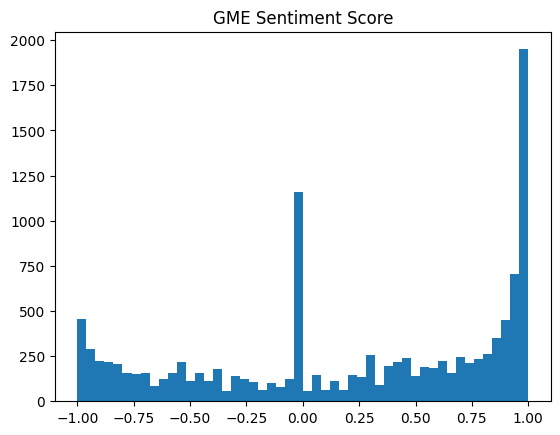

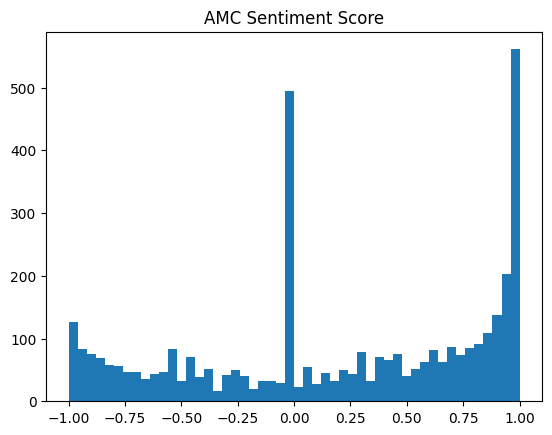

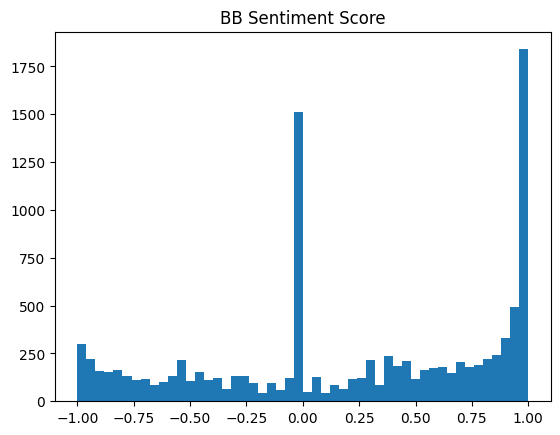

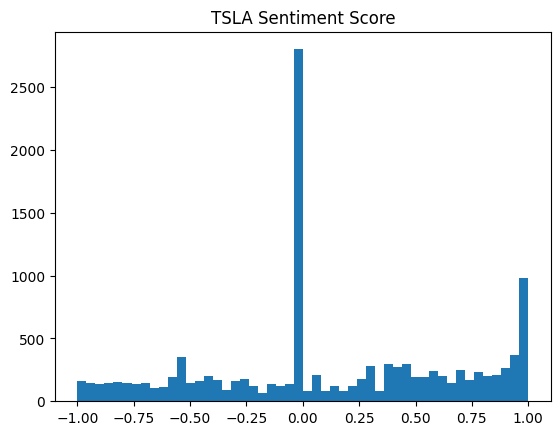

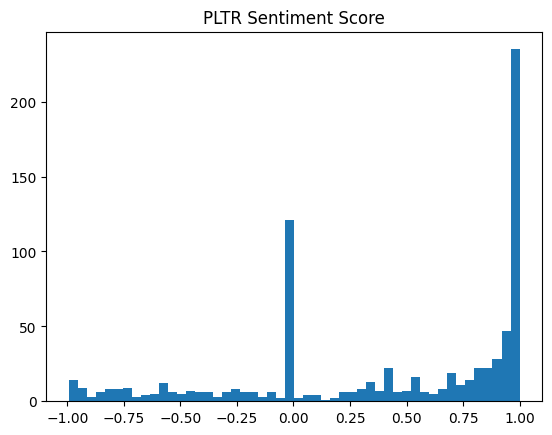

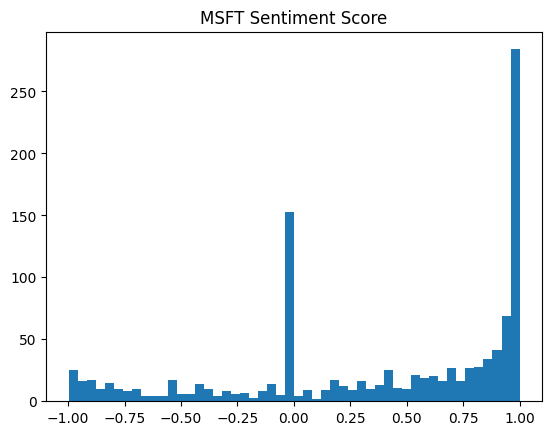

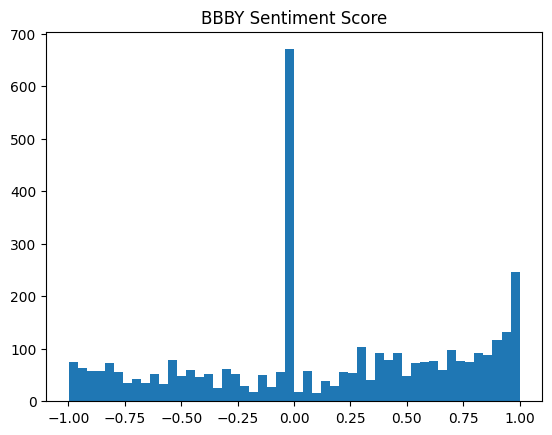

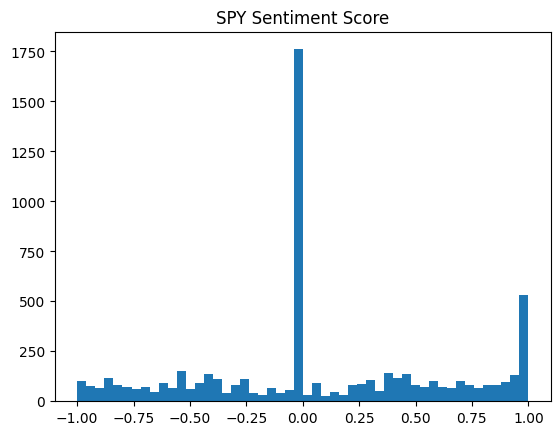

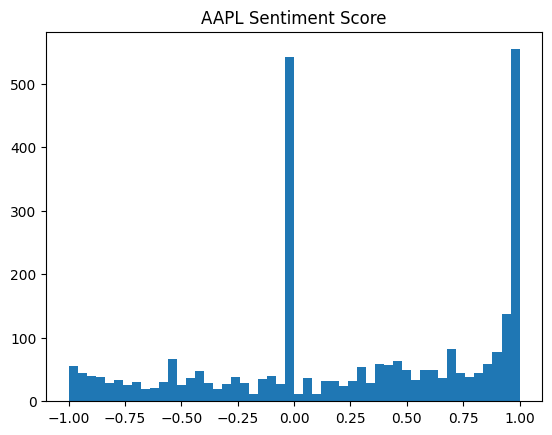

In [5]:
import matplotlib.pyplot as plt

for stock in stocks:
    df = dfs[stock]

    # Calculate sentiment score for each post
    df["sentiment_score"] = df["body"].apply(lambda x: get_sentiment_score(x))

    # plot histogram of sentiment scores
    plt.hist(df["sentiment_score"], bins=50)
    plt.title(f"{stock} Sentiment Score")
    plt.show()

In [6]:
# print sample of posts with emojis
pd.set_option('display.max_colwidth', 100)

df = dfs["AAPL"]
df[df["sentiment_score"] < -0.7]["original_body"].sample(5)


1862    [Stock Market \\"Lines in the Sand\\"](https://preview.redd.it/6hkogdixpsq91.jpg?width=640&forma...
1220    [Happy 4th of July](https://preview.redd.it/47q88fk5xk991.jpg?width=640&format=pjpg&auto=webp&s=...
272     Listen up retards, I know as well as you do that GME is bound to hit $800 next week, and that RK...
2664       I made 100k on Amazon and lost it all. So I’m even now. But block apple ford crypto- I could cry
2070    Sup Ladies and Gentleman, and all you other degenerates.  I would like to discuss the event that...
Name: original_body, dtype: object